<H1>Linear Regression to predict sales from advertisment expendicure</H1>
<p>The aim of this project is to use a simple linear regression model to predict the volume of sales by taking the input of expendicure on adverstisment on TV, news paper and radio. </p>
<p>We are useing the following dataset from kaggle : <a href='https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset'>link</a> </p> 

<H3>Loading Libary</H3>

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import matplotlib.pyplot as plt

<H3>Loading the dataset</H3>

In [2]:
data =pd.read_csv(r"D:\ML dataset\Unzipped file\Advertising dataset\Advertising.csv")
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


<p> As we can see from the output we have 3 variables (TV,radio,Newspaper) and one target varliable(sales) with 200 rows. We have no null values and the type of the variables is float </p>

In [4]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


As we can see from the above output, the TV has the highest correaltionship with sales figure, followed by radio and then by newspapers.

<H3>Test Trian Split</H3>
<p>We split the data into testing and training dataset with test dataset being 20 % or having 40 values </p>

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data.drop(['Sales'],axis=1),data['Sales'],random_state=42,test_size=0.2)
print('Training data shape',X_train.shape,Y_train.shape)
print('Testing data shape',X_test.shape,Y_test.shape)

Training data shape (160, 3) (160,)
Testing data shape (40, 3) (40,)


<H3>Importing metric</H3>
<p>We will be using explanied varinance, MAE(mean absolute error), MSE (mean squared error), MSLE (mean squared log error), median aboslute error</p>

In [6]:
import sklearn.metrics as metrics

<H3>Linear Regression</H3>
<p>We are useing a simple linear regression </p>

In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train.to_numpy(),Y_train.to_numpy())
print('Intercept',reg.intercept_)
print('Coeeficent',reg.coef_)
y_pred=reg.predict(X_train.to_numpy())
y_true=Y_train.to_numpy()
explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
mse=metrics.mean_squared_error(y_true, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
r2=metrics.r2_score(y_true, y_pred)
print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Intercept 2.979067338122629
Coeeficent [0.04472952 0.18919505 0.00276111]
explained_variance:  0.8957
mean_squared_log_error:  0.0304
r2:  0.8957
MAE:  1.1985
MSE:  2.7051
RMSE:  1.6447


<p>As we can see the intercept is 2.98 and the coeffient for TV, newspaper and radio are 0.044, 0.189 and 0.002 respectively. We also see that the explained varieance is 0.8957 meaning that the model explain 89.57 of the variation in target variable in the dataset. Overall the model perfoamnce is good, given we have not optimised any hyper parameter on it.</p>

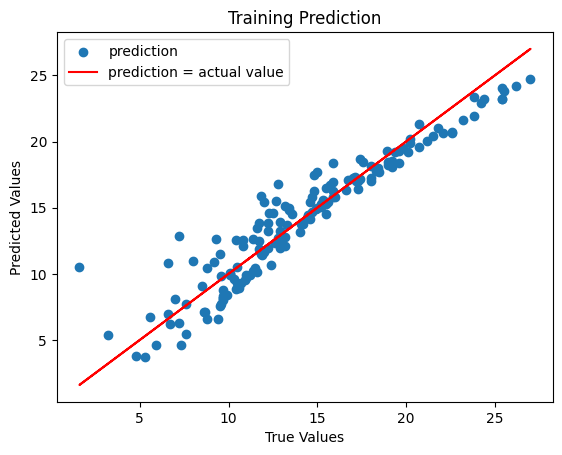

In [8]:
plt.scatter(y_true,y_pred,label='prediction')
plt.plot(y_true,y_true,color='red',label='prediction = actual value')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training Prediction')
plt.legend()

In [9]:
y_pred=reg.predict(X_test.to_numpy())
y_true=Y_test.to_numpy()
explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
mse=metrics.mean_squared_error(y_true, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
r2=metrics.r2_score(y_true, y_pred)
print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.8997
mean_squared_log_error:  0.0308
r2:  0.8994
MAE:  1.4608
MSE:  3.1741
RMSE:  1.7816


 We also see that the explained varieance is 0.8997 meaning that the model explain 89.97 of the variation in target variable in the testing dataset. Overall the model perfoamnce is good, given we have not optimised any hyper parameter on it.</p>

Text(0.5, 1.0, 'Testing Prediction')

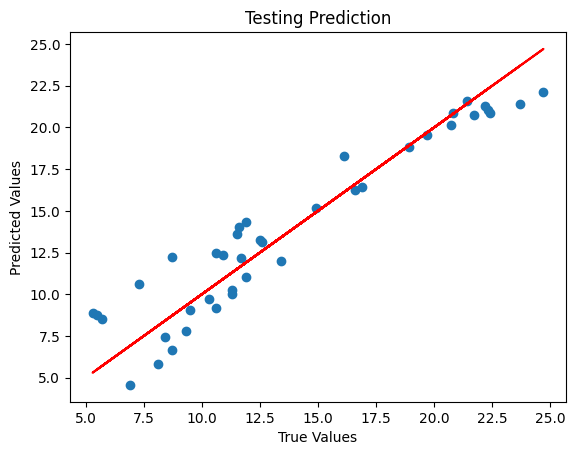

In [10]:
plt.scatter(y_true,y_pred)
plt.plot(y_true,y_true,color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Testing Prediction')

In [11]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train.to_numpy(),Y_train.to_numpy())
print('Intercept',reg.intercept_)
print('Coeeficent',reg.coef_)
y_pred=reg.predict(X_train.to_numpy())
y_true=Y_train.to_numpy()
explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
mse=metrics.mean_squared_error(y_true, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
r2=metrics.r2_score(y_true, y_pred)
print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Intercept 2.979112937240272
Coeeficent [0.04472952 0.18919187 0.00276199]
explained_variance:  0.8957
mean_squared_log_error:  0.0304
r2:  0.8957
MAE:  1.1985
MSE:  2.7051
RMSE:  1.6447


<p>As we can see the intercept is 2.98 and the coeffient for TV, newspaper and radio are 0.044, 0.189 and 0.002 respectively. We also see that the explained varieance is 0.8957 meaning that the model explain 89.57 of the variation in target variable in the dataset. Overall the model perfoamnce is good, given we have not optimised any hyper parameter on it.</p>

Text(0.5, 1.0, 'Training Prediction')

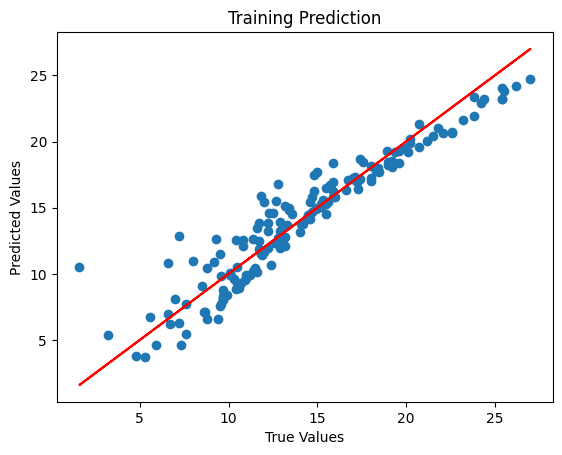

In [12]:
plt.scatter(y_true,y_pred)
plt.plot(y_true,y_true,color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training Prediction')

In [13]:
y_pred=reg.predict(X_test.to_numpy())
y_true=Y_test.to_numpy()
explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
mse=metrics.mean_squared_error(y_true, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
r2=metrics.r2_score(y_true, y_pred)
print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.8997
mean_squared_log_error:  0.0308
r2:  0.8994
MAE:  1.4608
MSE:  3.1741
RMSE:  1.7816


Text(0.5, 1.0, 'Testing Prediction')

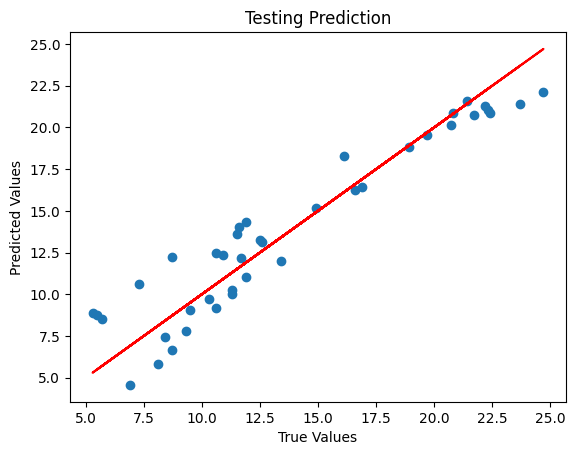

In [14]:
plt.scatter(y_true,y_pred)
plt.plot(y_true,y_true,color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Testing Prediction')

In [15]:
from statsmodels.api import add_constant
X_train = add_constant(X_train)
mod = sm.OLS(Y_train.to_numpy(),X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           2.53e-76
Time:                        14:04:55   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9791      0.354      8.427      0.0

In [16]:
print('Coeffient',res.params)
y_pred=res.predict(X_train)
y_true=Y_train.to_numpy()
explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
mse=metrics.mean_squared_error(y_true, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
r2=metrics.r2_score(y_true, y_pred)
print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Coeffient const        2.979067
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64
explained_variance:  0.8957
mean_squared_log_error:  0.0304
r2:  0.8957
MAE:  1.1985
MSE:  2.7051
RMSE:  1.6447


<p>As we can see the intercept is 2.9791 and the coeffient for TV, newspaper and radio are 0.053, 0.218 and 0.002 respectively. We also see that the explained varieance is 0.8957 meaning that the model explain 85.48 of the variation in target variable in the dataset. Overall the model perfoamnce is good, given we have not optimised any hyper parameter on it.</p>

In [17]:
X_test=add_constant(X_test)
y_pred=res.predict(X_test)
y_true=Y_test.to_numpy()
explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
mse=metrics.mean_squared_error(y_true, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
r2=metrics.r2_score(y_true, y_pred)
print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.8997
mean_squared_log_error:  0.0308
r2:  0.8994
MAE:  1.4608
MSE:  3.1741
RMSE:  1.7816
